<a href="https://colab.research.google.com/github/orbenishay/pandas-project/blob/master/Bicycle_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt # visualization, EDA
import numpy as np  # Mathematical calculations
%matplotlib inline
from datetime import datetime


In [8]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving station (1).csv to station (1).csv


In [10]:
df_station = pd.read_csv("station (1).csv", index_col = 'id')
df_station.head()

,station_name,lat,long,dock_count,city,installation_date
id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,08/06/2013
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,08/05/2013
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,08/06/2013
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,08/05/2013
6,San Pedro Square,37.336721,-121.894074,15,San Jose,08/07/2013


In [9]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving weather (1).csv to weather (1).csv


In [0]:
df_weather = pd.read_csv("weather (1).csv", parse_dates=['date'])
df_weather.head()


df_weather['date'] = pd.to_datetime(df_weather['date'], errors='coerce')
df_weather['date']=df_weather['date'].dt.date

In [15]:
df_weather['mean_temperature_c'] = (df_weather['mean_temperature_f'] - 32)*(5/9)
df_weather['date_month'] = pd.DatetimeIndex(df_weather['date']).month
df_weather['date_day'] = pd.DatetimeIndex(df_weather['date']).day
df_weather.head()

,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,mean_temperature_c,date_month,date_day
0,8/29/2013,68.0,75.0,10.0,11.0,0,4.0,NaN,286.0,94107,20.000000,8,29
1,8/30/2013,69.0,70.0,10.0,13.0,0,2.0,NaN,291.0,94107,20.555556,8,30
2,8/31/2013,64.0,75.0,10.0,15.0,0,4.0,NaN,284.0,94107,17.777778,8,31
3,09/01/2013,66.0,68.0,10.0,13.0,0,4.0,NaN,284.0,94107,18.888889,9,1
4,09/02/2013,69.0,77.0,10.0,12.0,0,6.0,NaN,277.0,94107,20.555556,9,2


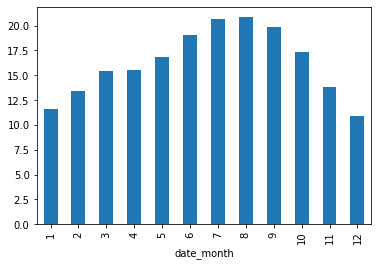

In [31]:
df_weather.groupby('date_month')['mean_temperature_c'].mean().plot.bar()

#we can see that in July & August the hotest weather- maybe it has more bycicle rents?

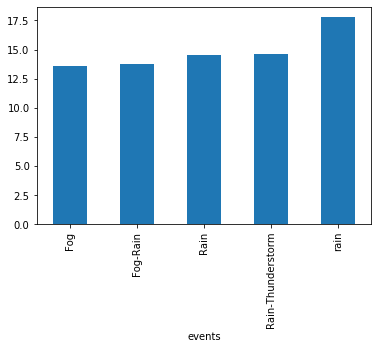

In [37]:
df_weather.groupby('events')['mean_temperature_c'].mean().plot.bar()

In [5]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving trip (1).csv to trip (1).csv


In [25]:
df_trip = pd.read_csv("trip (1).csv",
                   index_col='id', parse_dates=True)
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'], errors='coerce', dayfirst=True)
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'], errors='coerce', dayfirst=True)
df_trip['date_day']=df_trip['start_date'].dt.date
df_trip['duration']=df_trip['end_date']-df_trip['start_date']
df_trip.head()

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,date_day,duration
id,,,,,,,,,,
111309,35,35,247,Customer,94301,2013-11-30 13:29:00,08/12/2013 22:06,2013-12-08 22:49:00,2013-11-30,8 days 09:20:00
129504,2,12,653,Subscriber,94041,2013-12-18 09:16:00,25/12/2013 13:18,2013-12-25 13:29:00,2013-12-18,7 days 04:13:00
364841,27,27,13,Customer,94041,2014-07-15 16:23:00,19/07/2014 17:18,2014-07-19 17:45:00,2014-07-15,4 days 01:22:00
364842,27,27,126,Customer,94041,2014-07-15 16:23:00,19/07/2014 08:47,2014-07-19 09:21:00,2014-07-15,3 days 16:58:00
21917,14,6,650,Customer,95113,2013-09-15 00:37:00,17/09/2013 18:28,2013-09-17 19:04:00,2013-09-15,2 days 18:27:00


In [0]:
#df_trip['start_station_id'].value_counts().plot.bar(figsize=(8,8))

In [12]:
df_station_count = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_station_count.head()

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,station_name,lat,long,dock_count,city,installation_date
0,35,35,247,Customer,94301,30/11/2013 13:29,08/12/2013 22:06,08/12/2013 22:49,University and Emerson,37.444521,-122.163093,11,Palo Alto,8/15/2013
1,2,12,653,Subscriber,94041,18/12/2013 09:16,25/12/2013 13:18,25/12/2013 13:29,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,08/06/2013
2,27,27,13,Customer,94041,15/07/2014 16:23,19/07/2014 17:18,19/07/2014 17:45,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,27,27,126,Customer,94041,15/07/2014 16:23,19/07/2014 08:47,19/07/2014 09:21,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
4,14,6,650,Customer,95113,15/09/2013 00:37,17/09/2013 18:28,17/09/2013 19:04,Arena Green / SAP Center,37.332692,-121.900084,19,San Jose,08/05/2013


In [0]:
#df_station_count.groupby(['station_name', 'city']).agg({'station_name':'count'}).plot.bar(figsize=(12,8))

In [0]:
station_by_city = df_station_count.groupby(['station_name', 'city']).agg({'station_name':'count'}).unstack(1)
station_by_city

station_name  ...         
city                                          Mountain View  ... San Jose
station_name                                                 ...         
2nd at Folsom                                           NaN  ...      NaN
2nd at South Park                                       NaN  ...      NaN
2nd at Townsend                                         NaN  ...      NaN
5th at Howard                                           NaN  ...      NaN
Adobe on Almaden                                        NaN  ...     65.0
...                                                     ...  ...      ...
Temporary Transbay Terminal (Howard at Beale)           NaN  ...      NaN
Townsend at 7th                                         NaN  ...      NaN
University and Emerson                                  NaN  ...      NaN
Washington at Kearney                                   NaN  ...      NaN
Yerba Buena Center of the Arts (3rd @ Howard)           NaN  ...      NaN

[70 rows x 5 columns]

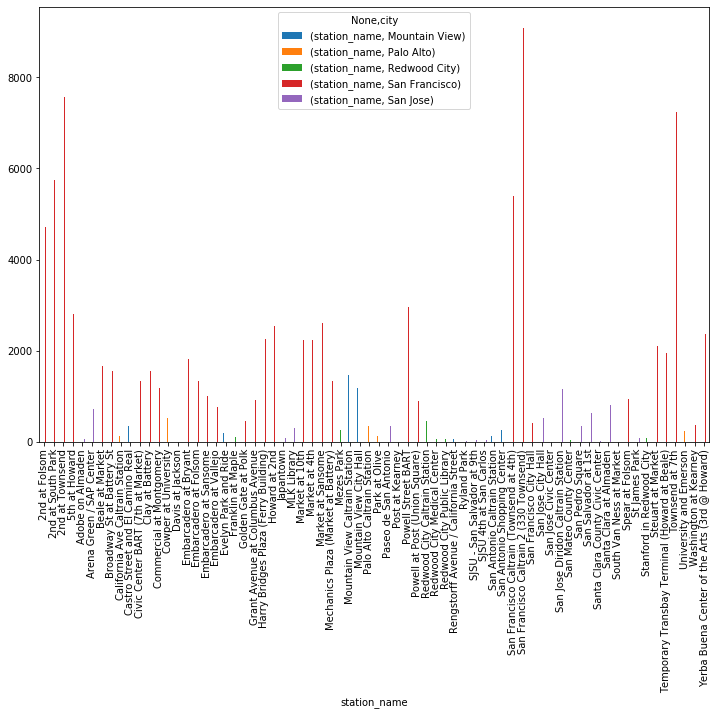

In [0]:
station_by_city.plot(kind='bar',figsize=(12,8))

In [0]:
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'])
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'])
df_trip['duration']= df_trip['end_date'] - df_trip['start_date']
df_trip.head()

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,duration
id,,,,,,,,,
4275,75,66,626,Subscriber,94107,2013-08-29 11:43:00,29/08/2013 11:57,2013-08-29 12:12:00,00:29:00
4290,39,67,496,Customer,94107,2013-08-29 11:58:00,29/08/2013 12:03,2013-08-29 12:36:00,00:38:00
4319,66,56,546,Subscriber,94107,2013-08-29 12:10:00,29/08/2013 12:25,2013-08-29 13:04:00,00:54:00
4399,22,26,74,Subscriber,94041,2013-08-29 12:39:00,29/08/2013 12:45,2013-08-29 13:19:00,00:40:00
4442,46,77,607,Subscriber,94107,2013-08-29 12:56:00,29/08/2013 13:04,2013-08-29 13:45:00,00:49:00


In [0]:
df_trip['start_date_2'] = df_trip['start_date'].dt.date
df_trip

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,duration,start_date_2
id,,,,,,,,,,
4275,75,66,626,Subscriber,94107,2013-08-29 11:43:00,29/08/2013 11:57,2013-08-29 12:12:00,00:29:00,2013-08-29
4290,39,67,496,Customer,94107,2013-08-29 11:58:00,29/08/2013 12:03,2013-08-29 12:36:00,00:38:00,2013-08-29
4319,66,56,546,Subscriber,94107,2013-08-29 12:10:00,29/08/2013 12:25,2013-08-29 13:04:00,00:54:00,2013-08-29
4399,22,26,74,Subscriber,94041,2013-08-29 12:39:00,29/08/2013 12:45,2013-08-29 13:19:00,00:40:00,2013-08-29
4442,46,77,607,Subscriber,94107,2013-08-29 12:56:00,29/08/2013 13:04,2013-08-29 13:45:00,00:49:00,2013-08-29
...,...,...,...,...,...,...,...,...,...,...
913434,69,65,521,Subscriber,94107,2015-08-31 21:19:00,31/08/2015 21:24,2015-08-31 21:39:00,00:20:00,2015-08-31
913440,77,82,621,Subscriber,94107,2015-08-31 21:31:00,31/08/2015 21:36,2015-08-31 22:00:00,00:29:00,2015-08-31
913442,67,70,531,Subscriber,94107,2015-08-31 21:44:00,31/08/2015 21:54,2015-08-31 22:06:00,00:22:00,2015-08-31


In [0]:
#df_weather['date_1'] = df_weather['date'].dt.date

df_weather.head()

,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,mean_temperature_c
0,8/29/2013,68.0,75.0,10.0,11.0,0,4.0,NaN,286.0,94107,20.000000
1,8/30/2013,69.0,70.0,10.0,13.0,0,2.0,NaN,291.0,94107,20.555556
2,8/31/2013,64.0,75.0,10.0,15.0,0,4.0,NaN,284.0,94107,17.777778
3,09/01/2013,66.0,68.0,10.0,13.0,0,4.0,NaN,284.0,94107,18.888889
4,09/02/2013,69.0,77.0,10.0,12.0,0,6.0,NaN,277.0,94107,20.555556


In [0]:
df_duration_weather = df_trip.merge(df_weather, how='left', left_on = ['zip_code','start_date_2'], right_on=['zip_code','date'])
df_duration_weather.head()

,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,duration,start_date_2,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,mean_temperature_c
0,75,66,626,Subscriber,94107,2013-08-29 11:43:00,29/08/2013 11:57,2013-08-29 12:12:00,00:29:00,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,67,496,Customer,94107,2013-08-29 11:58:00,29/08/2013 12:03,2013-08-29 12:36:00,00:38:00,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66,56,546,Subscriber,94107,2013-08-29 12:10:00,29/08/2013 12:25,2013-08-29 13:04:00,00:54:00,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,26,74,Subscriber,94041,2013-08-29 12:39:00,29/08/2013 12:45,2013-08-29 13:19:00,00:40:00,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,77,607,Subscriber,94107,2013-08-29 12:56:00,29/08/2013 13:04,2013-08-29 13:45:00,00:49:00,2013-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_duration_weather['mean_temperature_c_bins'] = pd.cut(x= df_duration_weather['mean_temperature_c'], bins= 3, labels= ['0-15', '16-25', '26-70'], duplicates = 'drop')
df_duration_weather.head()


In [0]:
df_duration_weather.boxplot(column = 'duration',by= 'mean_temperature_f_bins')

In [30]:
# Merges
df_trip_weather = df_trip.merge(df_weather, how='left', left_on = ['zip_code', 'date'], right_on=['zip_code','date_day'])
# df_trip_weather.head()
df_trip_weather_station = df_trip_weather.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
# df_trip_weather_station.head()
df_all = df_trip_weather_station.merge(df_bikes, how='left', left_on = 'bike_id', right_on='bike_id')
df_all.head()

KeyError: ignored